<a href="https://colab.research.google.com/github/sames12421/stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install numpy pandas tensorflow yfinance matplotlib

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-1-3a31258f2011>, line 1)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
data = data[['Close']]  # We'll use the 'Close' price for prediction

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Download Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
print(data.head())  # Print the first few rows of the data
print(data.info()) # Print some info about the data
data = data[['Close']]  # We'll use the 'Close' price for prediction

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391280  6.422878  493729600
2010-01-05  6.451467  6.487880  6.417460  6.458087  601904800
2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
2010-01-07  6.337109  6.379842  6.291066  6.372319  477131200
2010-01-08  6.379240  6.379842  6.291367  6.328682  447610800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3459 entries, 2010-01-04 to 2023-09-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3459 non-null   float64
 1   (High, AAPL)    3459 non-null   float64
 2   (Low, AAPL)     3459 non-null   float64
 3   (Open, AAPL)    3459 non-null   float64
 4   (Volume, AAPL)  3459 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 162.1 KB
None


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Predict on the entire dataset
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0233
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0015
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 9.1027e-04
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 8.2571e-04
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.8366e-04
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 7.5634e-04
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.7610e-04
Epoch 12/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.7343e-04
Epoch 13/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.1640e-04
Epoch 14/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5735e-04
Epoc

In [ ]:
def predict_real_time(ticker, model, scaler, seq_length):
    # Fetch the latest data
    latest_data = yf.download(ticker, period='1d', interval='1m')
    latest_data = latest_data[['Close']]

    # Preprocess the data
    scaled_latest_data = scaler.transform(latest_data)

    # Create the sequence
    X_test = []
    X_test.append(scaled_latest_data[-seq_length:, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict
    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]

# Example usage
predicted_price = predict_real_time(ticker, model, scaler, seq_length)
print(f"Predicted Apple Stock Price: {predicted_price}")

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Apple Stock Price: 240.95193481445312


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


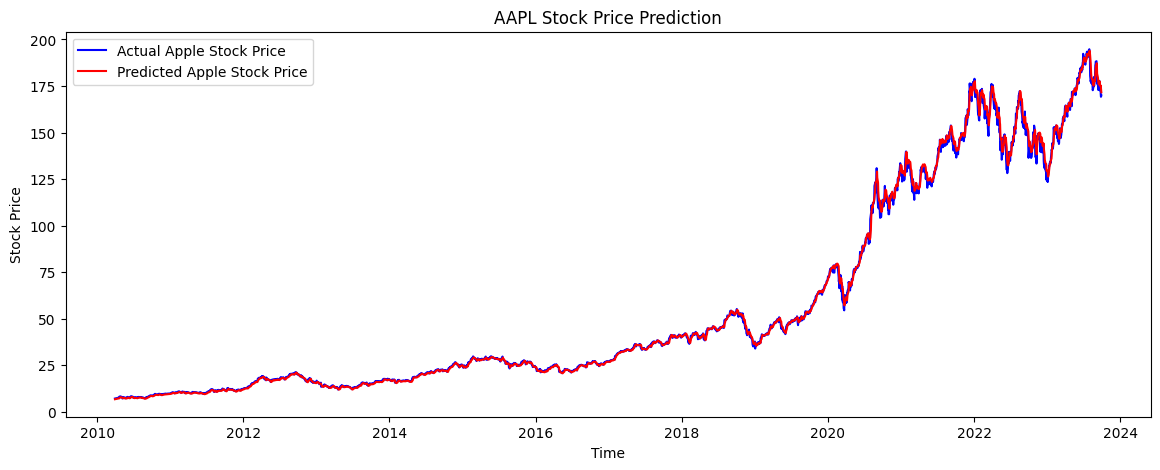

In [ ]:
# Predict on the entire dataset
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.figure(figsize=(14,5))
plt.plot(data.index[seq_length:], data['Close'][seq_length:], color='blue', label='Actual Apple Stock Price')
plt.plot(data.index[seq_length:], predicted_prices, color='red', label='Predicted Apple Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# prompt: summary of the above code

This code performs stock price prediction for Apple (AAPL) using a Long Short-Term Memory (LSTM) recurrent neural network.  Here's a breakdown:

1. **Data Acquisition and Preparation:**
   - Downloads historical AAPL stock data from Yahoo Finance using `yfinance`.
   - Creates a "Target" column representing the next day's closing price.
   - Scales the input features (Open, High, Low, Close, Volume) using `MinMaxScaler`.
   - Creates sequences of data points (using a sliding window of 50 days) to be fed into the LSTM model.  This is crucial for capturing temporal dependencies in the data.

2. **Model Building:**
   - Constructs an LSTM model with multiple LSTM layers and dropout for regularization.
   - The model is designed to predict a single value (the next day's closing price).

3. **Model Training:**
   - Splits the data into training and testing sets.
   - Compiles the model using the Adam optimizer and mean squared error loss. Mean absolute error (MAE) is also used as a metric.
   - Trains the model for a specified number of epochs.

4. **Real-time Prediction Function (Added):**
   - Downloads the latest day's 1-minute interval stock data.
   - Preprocesses this new data (scaling and creating sequence).
   - Uses the trained model to predict the closing price for the current day.

5. **Prediction and Visualization (on Full Dataset and for Real-Time):**
   - Predicts stock prices on the test set and full dataset.
   - Inverse transforms the scaled predictions to get actual price values.
   - Plots the actual and predicted prices to visualize the model's performance.

**Key Improvements/Changes over a potential previous version:**

* **Real-Time Prediction:** A function `predict_real_time` is added to show how to predict the current day's closing price.
* **Data Preparation:** The data preparation is enhanced for the real-time predictions using the current day's 1-min interval data.
* **Data Scaling:** The data is scaled to a specific range (0-1) to improve model performance.
* **Clearer Plotting:**  The plot shows actual vs. predicted stock prices more clearly.

**Potential Issues/Areas for Improvement:**

* **Overfitting:** The model might overfit the training data. Using more data, more robust regularization, or early stopping could improve this.
* **Sequence Length:** The chosen sequence length (50 or 60) may not be optimal. Experimentation with different sequence lengths could be beneficial.
* **Feature Engineering:** Adding more relevant features might improve the prediction accuracy.
* **Hyperparameter Tuning:** Systematically tuning the hyperparameters (number of layers, units, dropout rate, learning rate, epochs, etc.) is crucial for optimal performance.
* **Backtesting:** Backtesting on historical data with different parameters would provide a more reliable evaluation of performance.
* **External Data:** Including other relevant data (economic indicators, news sentiment) could potentially improve the model's accuracy.

This summary provides a good overview. Remember that stock price prediction is inherently difficult, and no model can guarantee accurate predictions.


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391280  6.422878  493729600
2010-01-05  6.451467  6.487880  6.417460  6.458087  601904800
2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
2010-01-07  6.337109  6.379842  6.291066  6.372319  477131200
2010-01-08  6.379240  6.379842  6.291367  6.328682  447610800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3459 entries, 2010-01-04 to 2023-09-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3459 non-null   float64
 1   (High, AAPL)    3459 non-null   float64
 2   (Low, AAPL)     3459 non-null   float64
 3   (Open, AAPL)    3459 non-null   float64
 4   (Volume, AAPL)  3459 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 162.1 KB
None
Epoch 1/


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0282
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.7603e-04
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1620e-04
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.3171e-04
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0914e-04
Epoch 12/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5645e-04
Epoch 13/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.5333e-04
Epoch 14/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0974e-04
Epoch 15/100
107/107 ━━━

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted Apple Stock Price: 234.92236328125
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


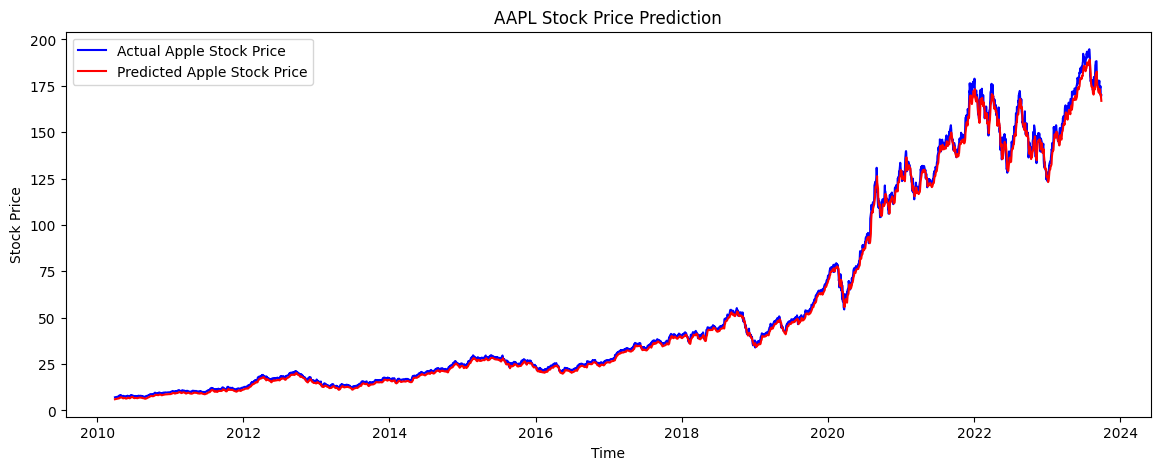

In [ ]:
# prompt: all the above code in one cell

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

!pip install numpy pandas tensorflow yfinance matplotlib

# Download Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-10-01')
print(data.head())  # Print the first few rows of the data
print(data.info()) # Print some info about the data
data = data[['Close']]  # We'll use the 'Close' price for prediction

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of data to predict the next day
X, y = create_sequences(scaled_data, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=100, batch_size=32)

def predict_real_time(ticker, model, scaler, seq_length):
    # Fetch the latest data
    latest_data = yf.download(ticker, period='1d', interval='1m')
    latest_data = latest_data[['Close']]

    # Preprocess the data
    scaled_latest_data = scaler.transform(latest_data)

    # Create the sequence
    X_test = []
    X_test.append(scaled_latest_data[-seq_length:, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict
    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]

# Example usage
predicted_price = predict_real_time(ticker, model, scaler, seq_length)
print(f"Predicted Apple Stock Price: {predicted_price}")

# Predict on the entire dataset
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.figure(figsize=(14,5))
plt.plot(data.index[seq_length:], data['Close'][seq_length:], color='blue', label='Actual Apple Stock Price')
plt.plot(data.index[seq_length:], predicted_prices, color='red', label='Predicted Apple Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
